# Lezione 1.2 - Teorema del Limite Centrale

## Obiettivo
Verificare il **Teorema del Limite Centrale** (CLT) utilizzando:
1. Distribuzione **esponenziale**: $p(x) = \lambda e^{-\lambda x}$ con $x \in [0,+\infty)$
2. Distribuzione **Cauchy-Lorentz**: $p(x) = \frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ con $x \in (-\infty,+\infty)$
3. Confronto con distribuzione **uniforme** (dado standard)

### **Teorema del Limite Centrale**
Data una sequenza di variabili aleatorie i.i.d. con media $\mu$ e varianza $\sigma^2$ finite, la media campionaria:
$$S_N = \frac{1}{N}\sum_{i=1}^N x_i$$
converge in distribuzione a una Gaussiana $\mathcal{N}(\mu, \sigma^2/N)$ per $N \to \infty$.

### **Metodo di Inversione**
Per generare $x$ da $p(x)$: si genera $r \sim U[0,1]$ e si calcola $x = F^{-1}(r)$ dove $F^{-1}$ è l'inversa della CDF.

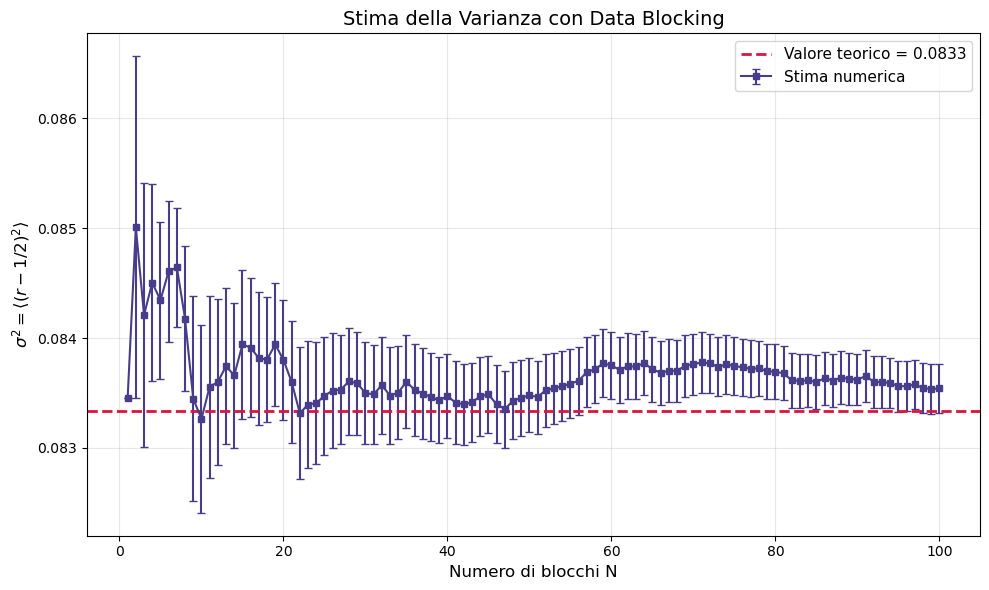

Valore finale: σ² = 0.083541 ± 0.000223
Valore teorico: σ² = 0.083333
Differenza: 0.000207 (0.9σ)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

### **Analisi della Varianza $\sigma^2 = 1/12$**

# Carico i dati per la varianza
data = np.loadtxt("output1_2.dat")

blocks = data[:,0]     # Numero di blocchi
mean = data[:,1]       # Media progressiva della varianza
error = data[:,2]      # Errore statistico

# Valore teorico per la varianza di U[0,1]: σ² = 1/12
theory_var = 1/12

# Plot migliorato
plt.figure(figsize=(10,6))
plt.errorbar(blocks, mean, yerr=error, fmt='s-', capsize=3, markersize=4,
             label="Stima numerica", color='darkslateblue')
plt.axhline(theory_var, color='crimson', linestyle='--', linewidth=2,
            label=f"Valore teorico = {theory_var:.4f}")
plt.xlabel("Numero di blocchi N", fontsize=12)
plt.ylabel("$\\sigma^2 = \\langle (r-1/2)^2 \\rangle$", fontsize=12)
plt.title("Stima della Varianza con Data Blocking", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Valore finale: σ² = {mean[-1]:.6f} ± {error[-1]:.6f}")
print(f"Valore teorico: σ² = {theory_var:.6f}")
print(f"Differenza: {abs(mean[-1] - theory_var):.6f} ({abs(mean[-1] - theory_var)/error[-1]:.1f}σ)")

### **Interpretazione dei Risultati**

Il grafico mostra la stima della varianza $\sigma^2 = \langle (r-1/2)^2 \rangle$ per una distribuzione uniforme:

- La stima converge al valore teorico $\sigma^2 = 1/12 \approx 0.0833$
- L'incertezza diminuisce sistematicamente con l'aumento dei blocchi
